In [170]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as pyo

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.offline as pyo

import plotly.graph_objects as go 
init_notebook_mode(connected=True)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

warnings.filterwarnings("ignore")

In [171]:
df=pd.read_csv("/home/developer/Downloads/Diwali_Sales_Data.csv", encoding='ISO-8859-1')
custom_cmap = sns.color_palette("RdYlBu", as_cmap=True) 
df.head().style.background_gradient(cmap=custom_cmap, axis=1) 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,nan,nan
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000,nan,nan
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000,nan,nan
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000,nan,nan
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000,nan,nan


In [172]:
df.describe(include="all").style.background_gradient(cmap=custom_cmap, axis=1) 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
count,11251.000000,11251,11251,11251,11251,11251.000000,11251.000000,11251,11251,11251,11251,11251.000000,11239.000000,0.000000,0.000000
unique,nan,1250,2351,2,7,nan,nan,16,5,15,18,nan,nan,nan,nan
top,nan,Vishakha,P00265242,F,26-35,nan,nan,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,nan,nan,nan,nan
freq,nan,42,53,7842,4543,nan,nan,1946,4296,1588,2655,nan,nan,nan,nan
mean,1003004.488134,nan,nan,nan,nan,35.421207,0.420318,nan,nan,nan,nan,2.489290,9453.610858,nan,nan
std,1716.125402,nan,nan,nan,nan,12.754122,0.493632,nan,nan,nan,nan,1.115047,5222.355869,nan,nan
min,1000001.000000,nan,nan,nan,nan,12.000000,0.000000,nan,nan,nan,nan,1.000000,188.000000,nan,nan
25%,1001492.000000,nan,nan,nan,nan,27.000000,0.000000,nan,nan,nan,nan,1.500000,5443.000000,nan,nan
50%,1003065.000000,nan,nan,nan,nan,33.000000,0.000000,nan,nan,nan,nan,2.000000,8109.000000,nan,nan
75%,1004430.000000,nan,nan,nan,nan,43.000000,1.000000,nan,nan,nan,nan,3.000000,12675.000000,nan,nan


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [174]:
# list of columns
df.columns.to_list()

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Marital_Status',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount',
 'Status',
 'unnamed1']

In [175]:
# no of unique values
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

In [176]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [177]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [178]:
# drop null values if in rows are all values is null
df["Amount"].dropna(how="All",inplace=True)

In [179]:
# fill the avg of amount in the  null place in Amount column
df["Amount"].fillna(df["Amount"].mean(),inplace=True)

In [180]:
# find duplicates
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [181]:
df.drop_duplicates(keep="first",inplace=True)

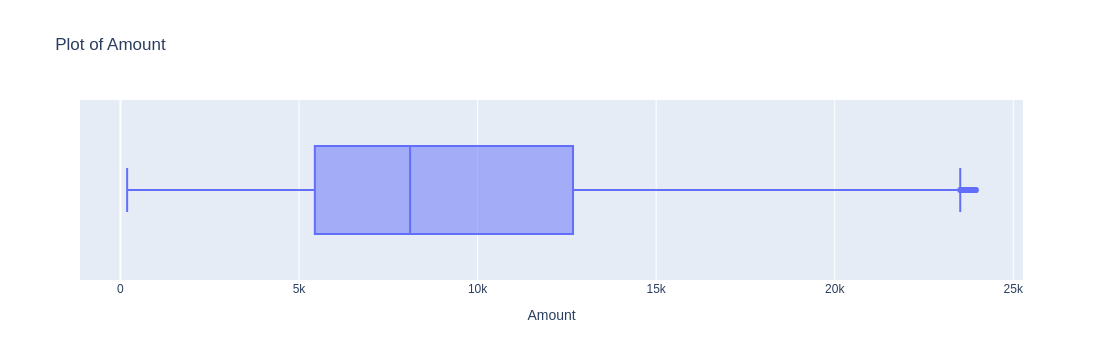

In [182]:
# Handling Outliyers '
fig=px.box(df,x="Amount",title="Plot of Amount")
fig.show()

In [183]:
# process to find outliyers
q1=df["Amount"].quantile(0.25)
q3=df["Amount"].quantile(0.95)
print("q1 = ",q1,"q3 = ",q3)
iqr= q3-q1
print("IQR =",iqr)
lower =q1-1.5*iqr 
upper =q3 +1.5*iqr
print("Lower ound =",lower, "Upper ound= ",upper)

q1 =  5444.0 q3 =  19509.8
IQR = 14065.8
Lower ound = -15654.699999999997 Upper ound=  40608.5


In [184]:
# now removing 
out =df[(df["Amount"]<=lower) | (df["Amount"]>=upper)].index
df.drop(out,inplace=True)

In [185]:
group_data=df.groupby("State")["Orders"].sum().reset_index()
group_data

,State,Orders
0,Andhra Pradesh,2054
1,Bihar,1058
2,Delhi,2744
3,Gujarat,1067
4,Haryana,1106
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3241
8,Kerala,1137
9,Madhya Pradesh,2259


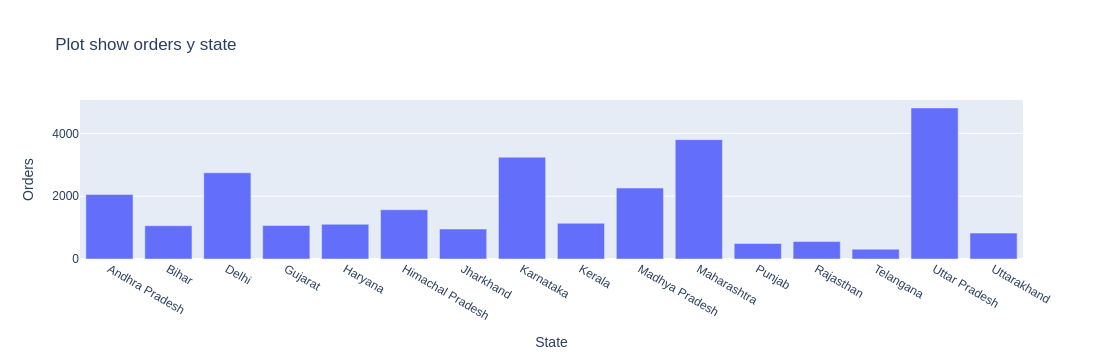

In [186]:
fig=px.bar(group_data,x="State",y="Orders",title="Plot show orders y state")
fig.show()

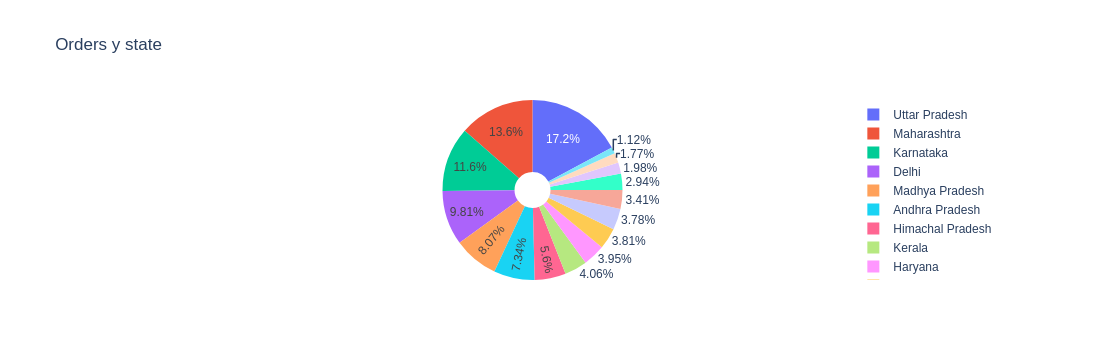

In [187]:
# Pie chart 
fig = go.Figure(data=[go.Pie(labels=group_data['State'], values=group_data['Orders'], hole=0.2)])
fig.update_layout(title='Orders y state')
fig.show()

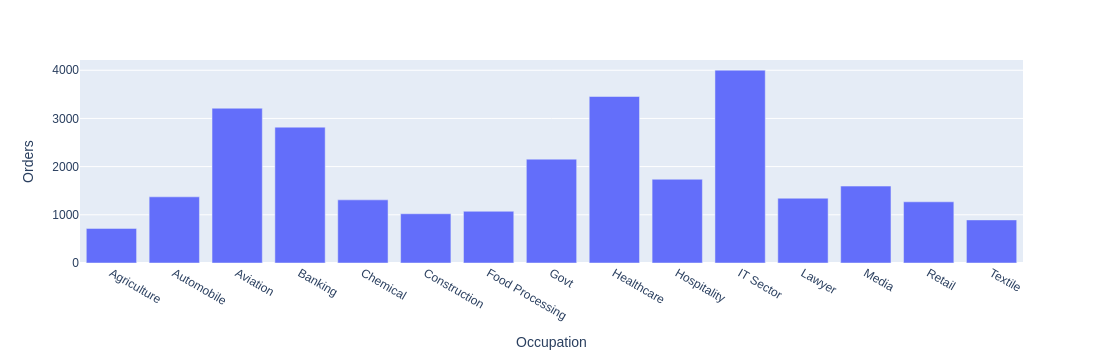

In [188]:
Ocuupation_with_Orders=df.groupby(["Occupation"])["Orders"].sum().reset_index()
fig = px.bar(Ocuupation_with_Orders,x="Occupation",y="Orders")
fig.show()

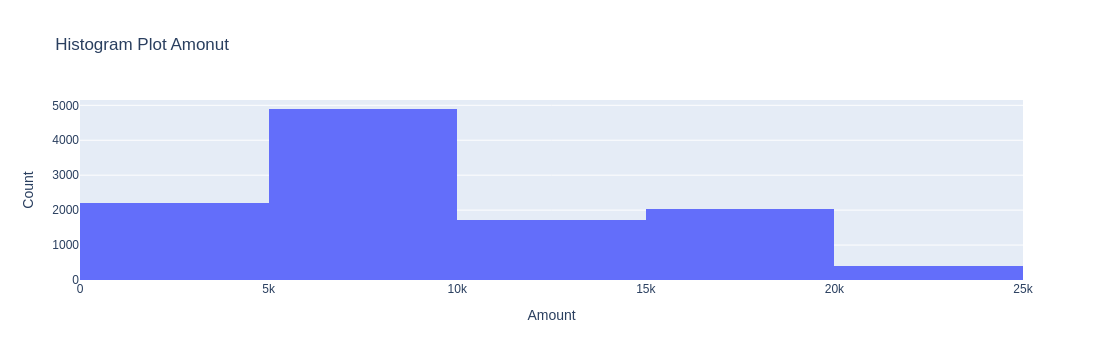

In [189]:
fig=px.histogram(df,x="Amount",title="Histogram Plot Amonut", nbins=10)
fig.update_xaxes(title="Amount")
fig.update_yaxes(title="Count")
fig.show()

In [190]:
 # What is the distribution of the number of orders across different product categories 
distribution_orders=df.groupby("Product_Category")["Orders"].sum().reset_index() 
distribution_orders

,Product_Category,Orders
0,Auto,245
1,Beauty,1086
2,Books,245
3,Clothing & Apparel,6627
4,Decor,235
5,Electronics & Gadgets,5208
6,Food,6120
7,Footwear & Shoes,2654
8,Furniture,890
9,Games & Toys,940


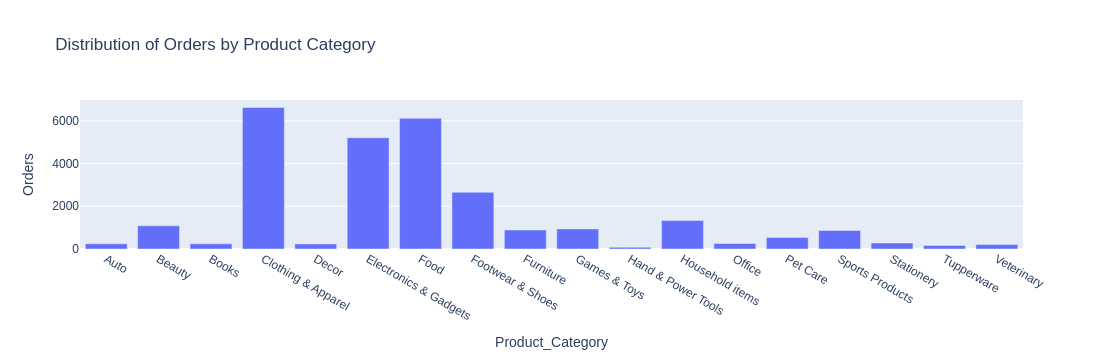

In [191]:
# show on Plot '
fig=px.bar(distribution_orders,x="Product_Category",y="Orders", title='Distribution of Orders by Product Category')
fig.show()

In [192]:
# How does the total amount spent vary across different age groups  
Age_Amount=df.groupby("Age Group")["Amount"].sum().reset_index()
Age_Amount


,Age Group,Amount
0,0-17,2.699653e+06
1,18-25,1.723553e+07
2,26-35,4.260068e+07
3,36-45,2.216350e+07
4,46-50,9.245658e+06
5,51-55,8.256816e+06
6,55+,4.090441e+06


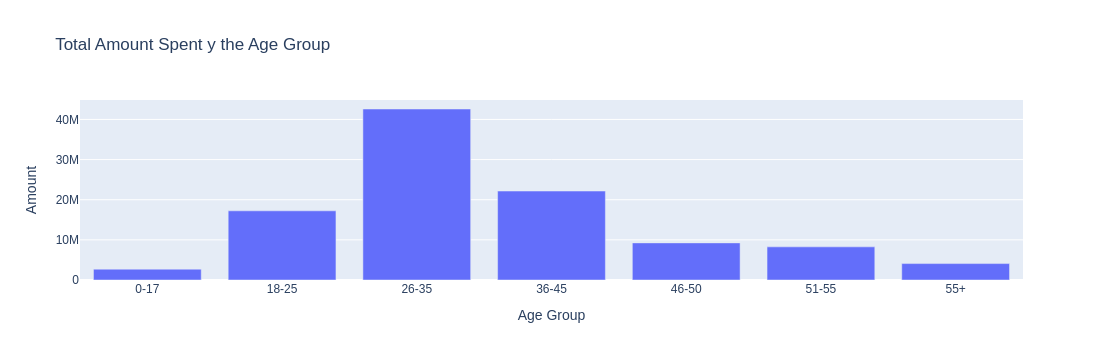

In [193]:
# show on plot
fig=px.bar(Age_Amount,x="Age Group",y="Amount",title="Total Amount Spent y the Age Group")
fig.show()

In [194]:
 # What is the average amount spent by customers of different genders  
Gender_Amount=df.groupby("Gender")["Amount"].mean().reset_index()
Gender_Amount

,Gender,Amount
0,F,9492.500451
1,M,9365.654397


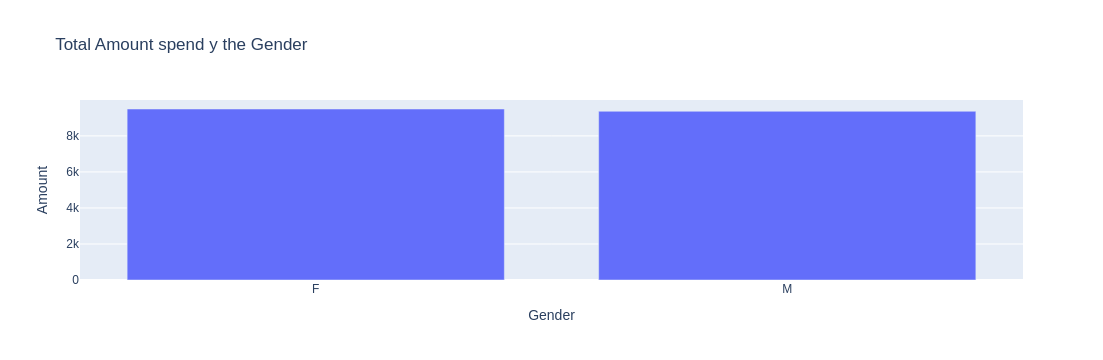

In [195]:
# show on plot 
fig=px.bar(Gender_Amount,x="Gender",y="Amount",title="Total Amount spend y the Gender ")
fig.show()

In [196]:
 # How does the total amount spent on different product categories vary across different zones 
Zone_Amount=df.groupby(["Product_Category","Zone"])["Amount"].sum().reset_index()

Zone_Amount

,Product_Category,Zone,Amount
0,Auto,Central,3.999876e+05
1,Auto,Eastern,7.963200e+04
2,Auto,Northern,8.557600e+04
3,Auto,Southern,1.246907e+06
4,Auto,Western,1.513006e+05
...,...,...,...
81,Veterinary,Central,9.236400e+04
82,Veterinary,Eastern,4.888000e+03
83,Veterinary,Northern,8.059000e+03
84,Veterinary,Southern,1.075000e+03


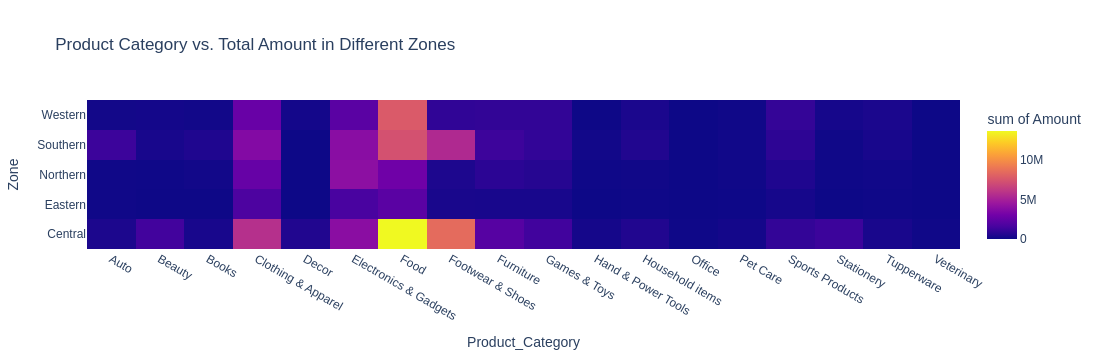

In [197]:
# show on plot
fig = px.density_heatmap(Zone_Amount, x='Product_Category', y='Zone', z='Amount', 
                         title='Product Category vs. Total Amount in Different Zones')
fig.show()

In [198]:
pyo.plot([{
    "x":df.Cust_name,
    "y":df.State
}])

'temp-plot.html'

In [124]:
order_pro=df[["Orders","Product_ID"]].head()
pyo.plot([{
    "x":order_pro.index,
    "y":order_pro[col],
    "name":col
}for col in order_pro.columns])


'temp-plot.html'

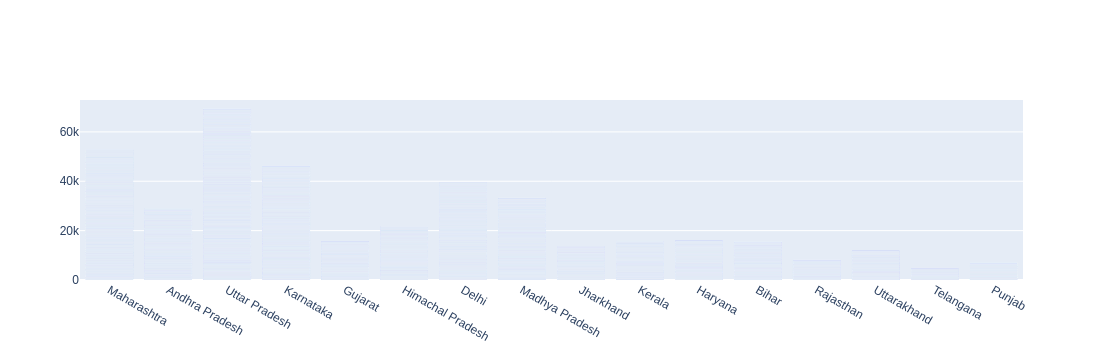

In [125]:
fig=go.Figure([go.Bar(x=df["State"],y=df["Age"])])
fig.show()

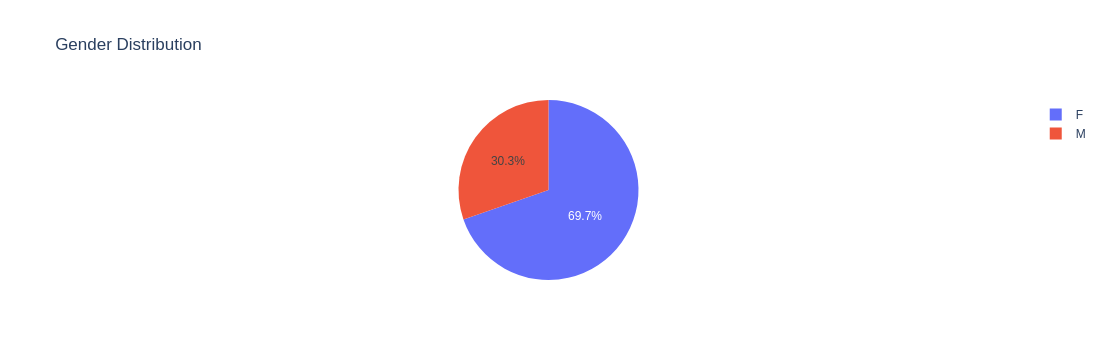

In [126]:
fig = go.Figure([go.Pie(labels=df['Gender'].value_counts().index, values=df['Gender'].value_counts())])
fig.update_layout(title="Gender Distribution")
fig.show()


In [127]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

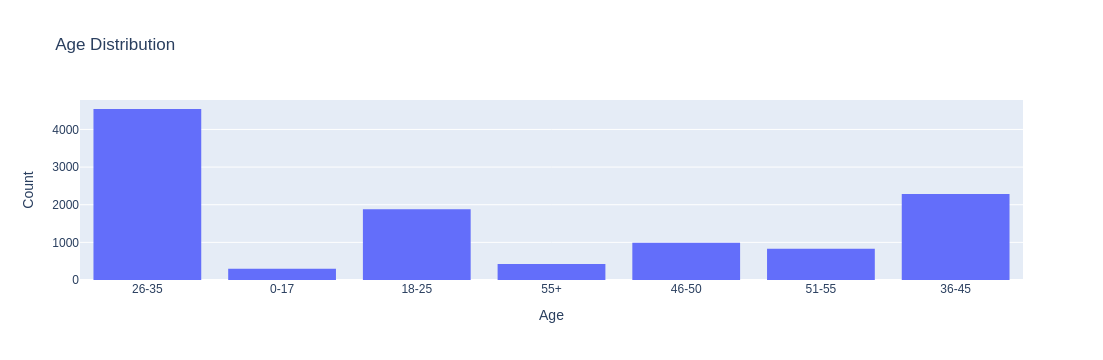

In [128]:
fig=go.Figure(data=[go.Histogram(x=df["Age Group"])])
fig.update_layout(title="Age Distribution", xaxis_title="Age", yaxis_title="Count")
fig.show()

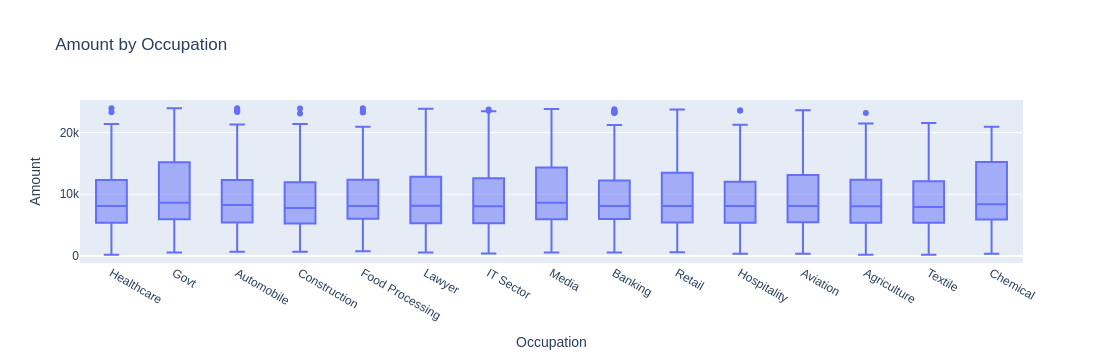

In [129]:
fig=go.Figure([go.Box(x=df["Occupation"],y=df["Amount"])])
fig.update_layout(title="Amount by Occupation",xaxis_title="Occupation",yaxis_title="Amount")
fig.show()

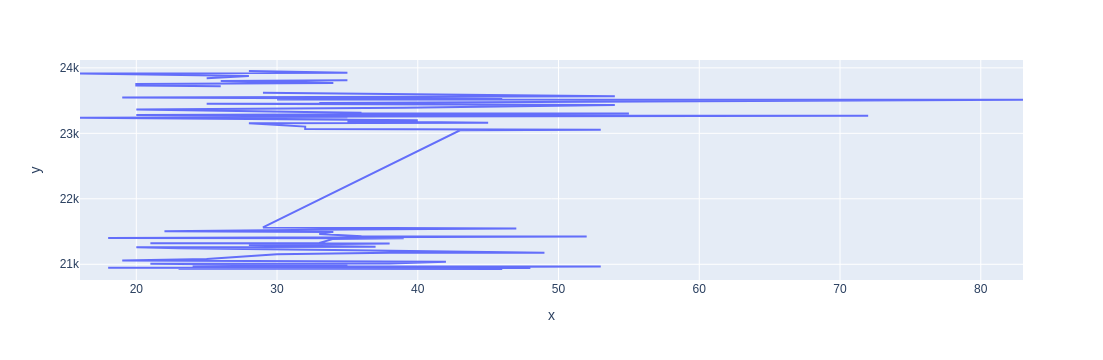

In [130]:
fig=px.line(x=df["Age"].head(100),y=df["Amount"].head(100))
fig.show()

In [131]:
pyo.plot([
      go.Scatter(
          x=df.Orders,
          y=df.Amount,
          mode="markers",
      )
])

'temp-plot.html'

In [14]:
numeric =df[["Age","Orders","Amount"]].corr()

<Axes: >

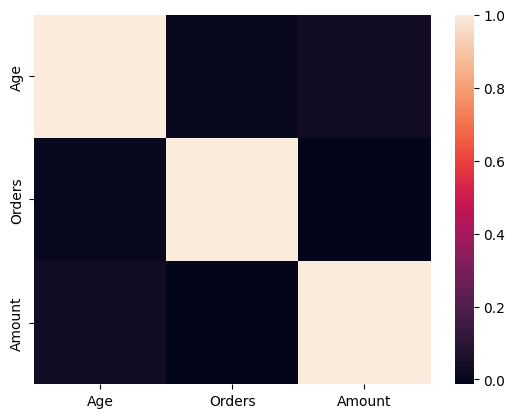

In [15]:
sns.heatmap(numeric)